<a href="https://colab.research.google.com/github/MIcoder003/Object-detection-for-Autonomus-Driving-with-YOLOv3/blob/main/MasterCopy_of_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yolo 3

In [ ]:
import cv2 as cv
import numpy as np
import time
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
import gdown

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1zH_nGTAl_LZJROASyZodhqk-0oP6_4qI/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1zH_nGTAl_LZJROASyZodhqk-0oP6_4qI
To: /content/yolov3.cfg
100% 8.34k/8.34k [00:00<00:00, 19.6MB/s]


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1IZscIUKTJLZKLADWvmY-GtR90-1rXh74/view?usp=share_link

Downloading...
From (uriginal): https://drive.google.com/uc?id=1IZscIUKTJLZKLADWvmY-GtR90-1rXh74
From (redirected): https://drive.google.com/uc?id=1IZscIUKTJLZKLADWvmY-GtR90-1rXh74&confirm=t&uuid=93d9bfdf-5814-44b4-abcd-1a677f337f71
To: /content/yolov3.weights
100% 248M/248M [00:05<00:00, 41.5MB/s]


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1wCI1LpoyoicGZdsk41Ag6JZYoLuuqRlM/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1wCI1LpoyoicGZdsk41Ag6JZYoLuuqRlM
To: /content/coco.names
100% 621/621 [00:00<00:00, 696kB/s]


In [ ]:
# Give the configuration and weight files for the model and load the network.
net = cv.dnn.readNetFromDarknet('/content/yolov3.cfg' , '/content/yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
# net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

In [ ]:
ln = net.getLayerNames()
#print(len(ln), ln)

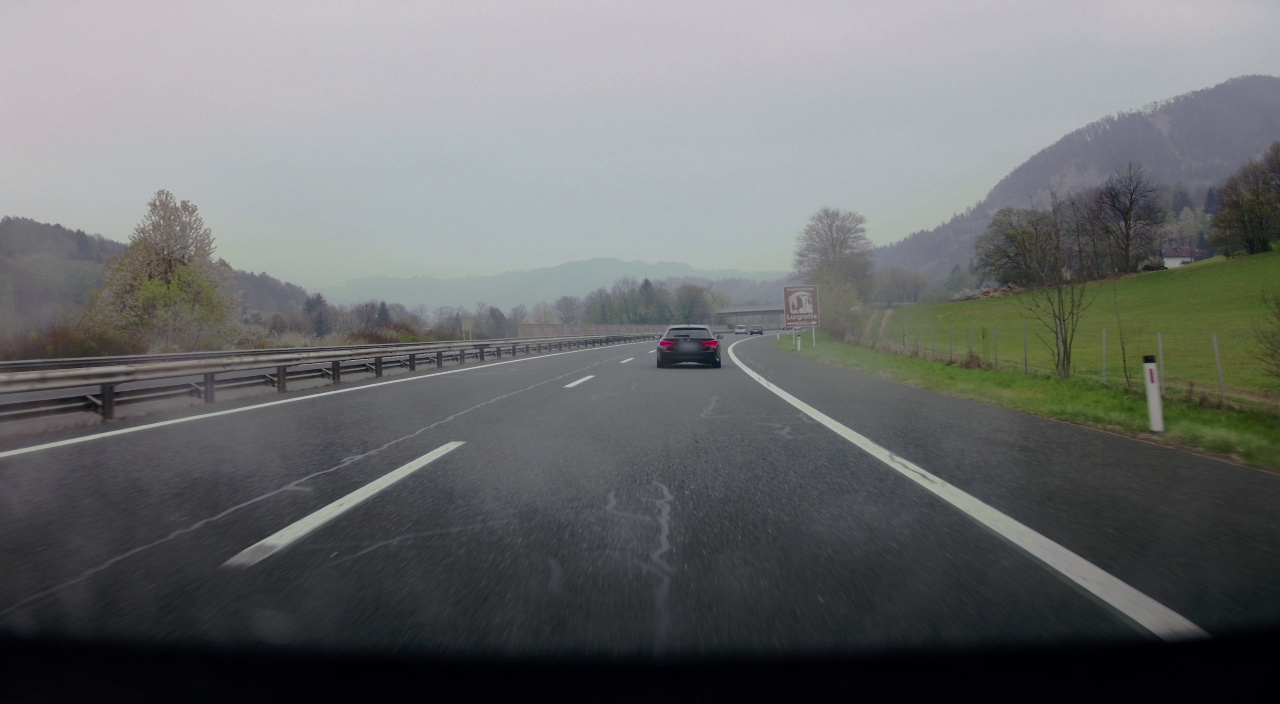

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

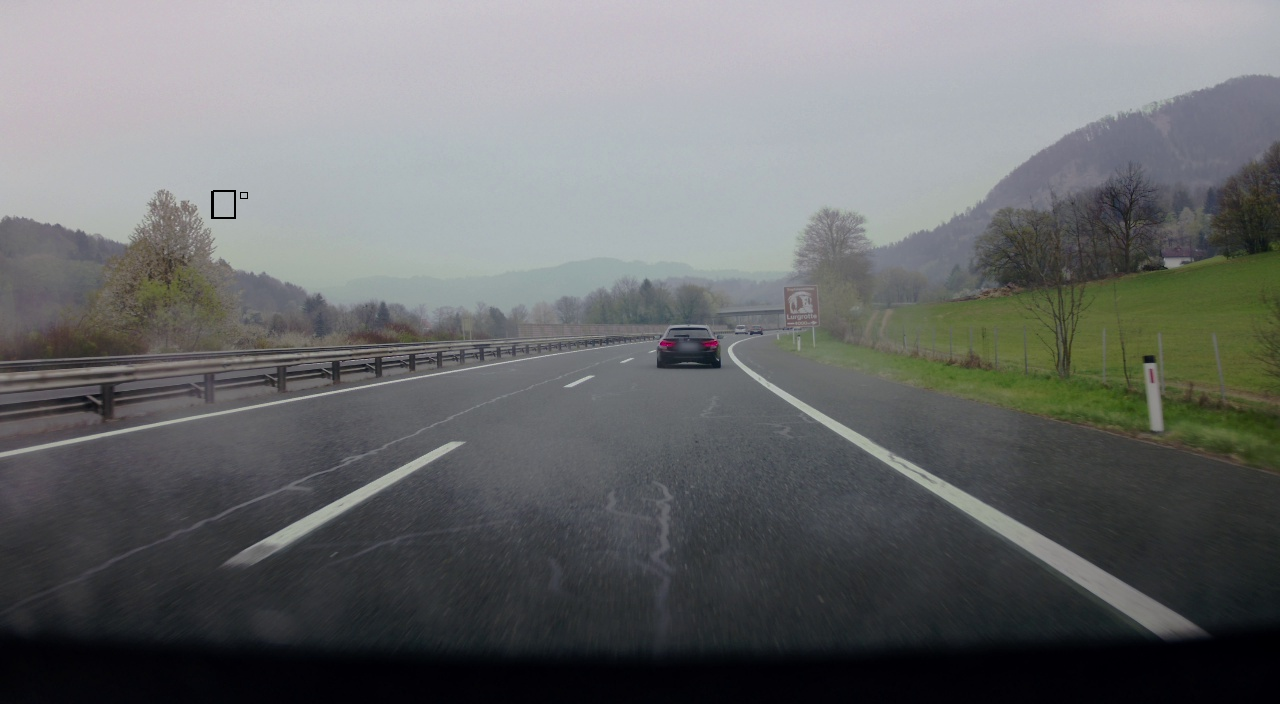

height: 704 width: 1280
score threshold 0.8 nms Threshold 0.5


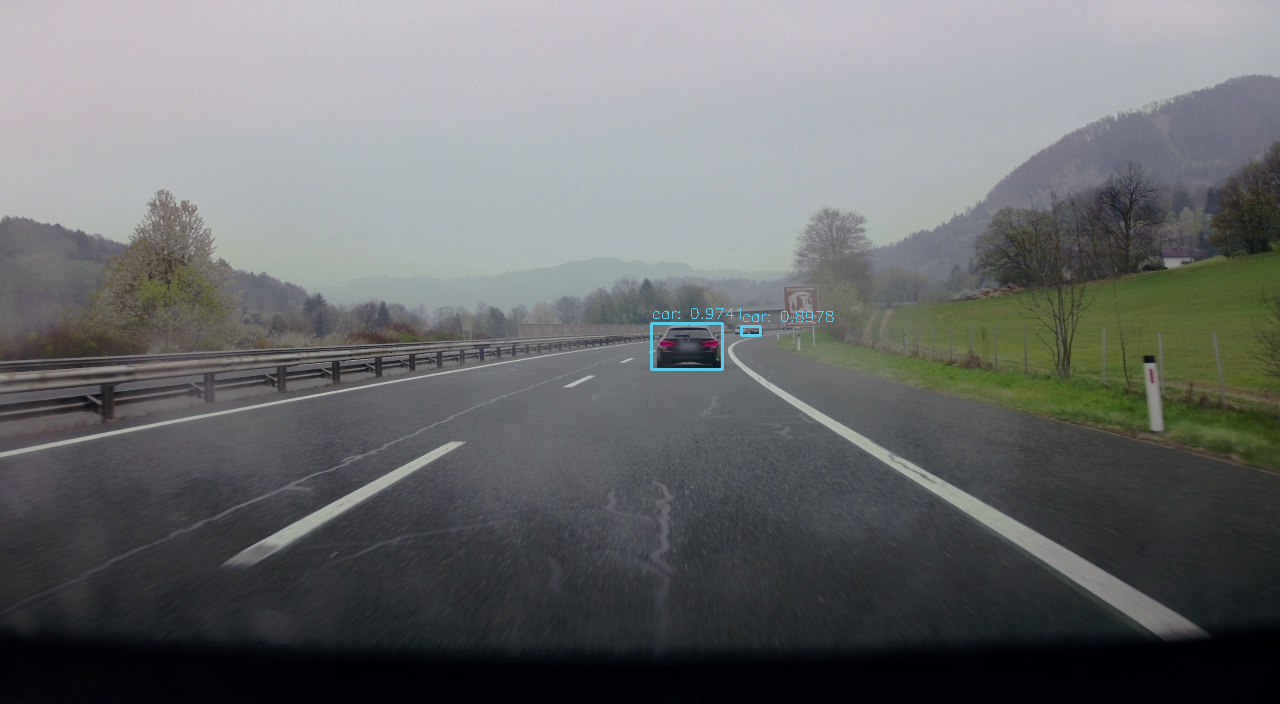

In [ ]:
import cv2 as cv
import numpy as np
import time
from google.colab.patches import cv2_imshow

img = cv.imread('/content/gdrive/MyDrive/AV_code/Dataset/Rain_1/sensor/camera/F_MIDLONGRANGECAM_CL/F_MIDLONGRANGECAM_CL_0051561.jpg')
cv2_imshow(img)
imgtemp=img.copy()
# Load names of classes and get random colors
classes = open('/content/coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Give the configuration and weight files for the model and load the network.

CON=0.7

# determine the output layer
ln = net.getLayerNames()
print(ln)
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]


# construct a blob from the image
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
r = blob[0, 0, :, :]
print(r.shape)



net.setInput(blob)
outputs = net.forward(ln)


print('outputs length',len(outputs))
for out in outputs:
    print('out shape',out.shape)
    #print(out)

def trackbar2(x):
    confidence = x/100
    r = r0.copy()
    for output in np.vstack(outputs):
        if output[4] > confidence:
            #print(output[:4])
            x, y, w, h = output[:4]
            p0 = int((x-w/2)*416), int((y-h/2)*416)
            p1 = int((x+w/2)*416), int((y+h/2)*416)
            cv.rectangle(r, p0, p1, 1, 1)
            cv.rectangle(imgtemp,p0, p1, 1, 1)
    w1,h1=imgtemp.shape[:2]
    print("height:",h1,"width:",w1)
    cv2_imshow(imgtemp)





r0 = blob[0, 0, :, :]
r = r0.copy()
trackbar2(CON*100)

boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]
print("height:",h,"width:",w)
for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > CON:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

#score_threshold=0.5
#nms_threshold=0.4

score_threshold=0.8
nms_threshold=0.5

print("score threshold",score_threshold,"nms Threshold",nms_threshold)
#0.5  0.4
indices = cv.dnn.NMSBoxes(boxes, confidences, score_threshold, nms_threshold)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)


cv2_imshow(img)

